**1. Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**2. Basic analysis of the dataset**

In [2]:
# Import the dataset
mp = pd.read_csv('/content/drive/MyDrive/Upublicznione/mobile-price-classification_train.csv')

In [3]:
# Checking the size of the dataset
mp.shape

(2000, 21)

In [4]:
# Checking 5 first rows of the dataset
mp.head(15)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
# Checking the datatypes
mp.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
# Checking if the values are complete in the dataset
# The result will be sum of missing values for whole dataframe
s = mp.isnull().sum() 
s.sum()

0

In [7]:
# Descriptive statistics for each variable
mp.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


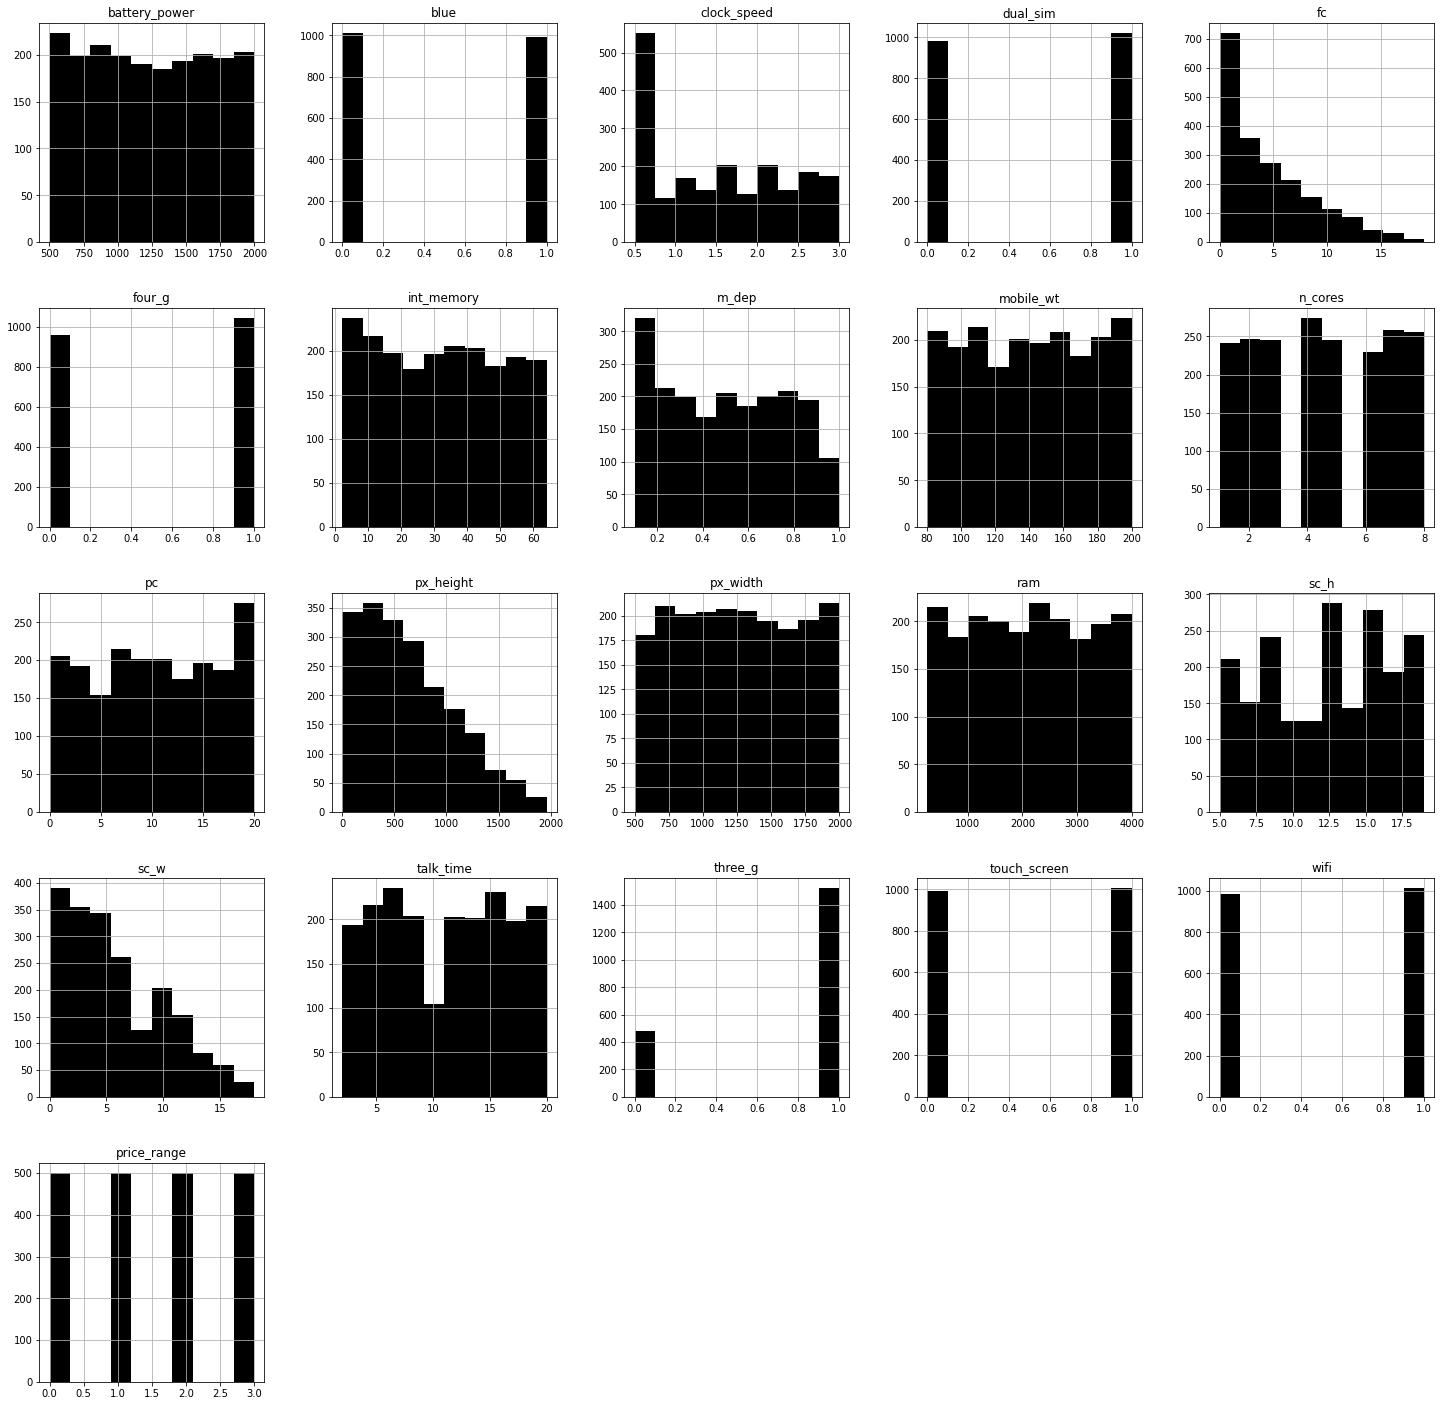

In [8]:
# Histogram for each variable
mp.hist(figsize=(25,25), color = 'black')
plt.show()

**Outliers dropping**

In [9]:
new_mp = mp.drop(['blue', 'dual_sim', 'four_g','three_g','touch_screen', 'wifi', 'price_range'], axis=1)
new_mp.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


**Outliers Analysis**

In [10]:
out = mp[['blue', 'dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

param = ['blue', 'dual_sim', 'four_g','three_g','touch_screen', 'wifi',]
pd.set_option('display.float_format', '{:.2%}'.format)

for i in param:
    result = mp[i].value_counts(normalize = True)
    print (result)
    print ('\n')

0   50.50%
1   49.50%
Name: blue, dtype: float64


1   50.95%
0   49.05%
Name: dual_sim, dtype: float64


1   52.15%
0   47.85%
Name: four_g, dtype: float64


1   76.15%
0   23.85%
Name: three_g, dtype: float64


1   50.30%
0   49.70%
Name: touch_screen, dtype: float64


1   50.70%
0   49.30%
Name: wifi, dtype: float64




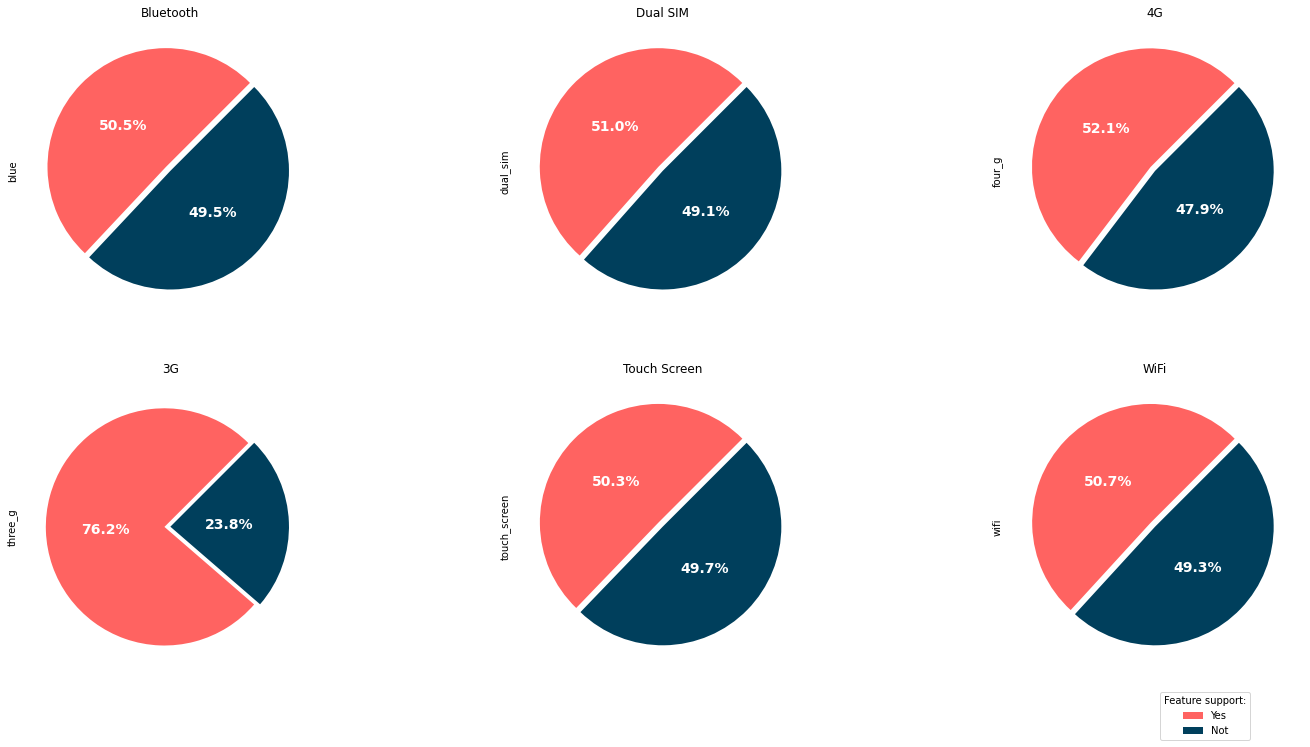

In [11]:
yn = ["Yes",'Not']
n = len(param)
l =[]

for x in range(n):
  l.append(x)


fig, axes = plt.subplots(2,3, figsize=(25, 12))
axe = axes.ravel()

#plt.title('Supporting of functions',fontweight='bold')
for i, x in enumerate(param):
  mp[x].value_counts().plot.pie (
      ax = axe[i],
      autopct='%1.1f%%',
      explode = (0.05, 0),
      pctdistance = 0.5,
      colors = ['#ff6361','#003f5c'],
      startangle = 45,
      textprops = {"fontsize":14, 'fontweight':'bold', 'color':'white'}
  )

axe[0].title.set_text('Bluetooth')
axe[1].title.set_text('Dual SIM')
axe[2].title.set_text('4G')
axe[3].title.set_text('3G')
axe[4].title.set_text('Touch Screen')
axe[5].title.set_text('WiFi')

plt.legend(title = "Feature support:", 
           loc='upper left', 
           labels=yn, 
           bbox_to_anchor=(0.5, -0.04))

plt.show()

**Explanatory variable analysis**

In [12]:
# The size of the grouped price_range variable
mpGr = mp.groupby(['price_range'])
mpGr.size()

price_range
0    500
1    500
2    500
3    500
dtype: int64

In [13]:
# Average values of varables for the grouped price_range variable
mpGr.mean()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,111690.20%,48.60%,155.02%,50.00%,408.40%,51.80%,3117.40%,49.02%,14055.20%,460.00%,957.40%,53640.80%,115027.00%,78531.40%,1232.40%,568.20%,1061.20%,74.60%,52.40%,49.60%
1,122886.80%,49.00%,148.86%,51.00%,434.00%,52.40%,3211.60%,52.40%,14051.00%,429.80%,992.40%,66689.20%,125190.80%,167949.00%,1221.20%,554.40%,1136.20%,75.60%,52.20%,50.40%
2,122832.00%,48.60%,152.98%,49.80%,449.80%,49.40%,3092.00%,49.08%,14361.40%,468.20%,1001.80%,63228.40%,123404.60%,258281.60%,1201.00%,571.40%,1097.20%,77.40%,47.00%,50.40%
3,137998.40%,51.80%,152.04%,53.00%,431.60%,55.00%,3397.60%,50.20%,13632.00%,450.20%,1015.00%,74484.80%,136983.80%,344923.20%,1268.00%,612.80%,1109.80%,77.00%,49.60%,52.40%


**The correlation analysis**

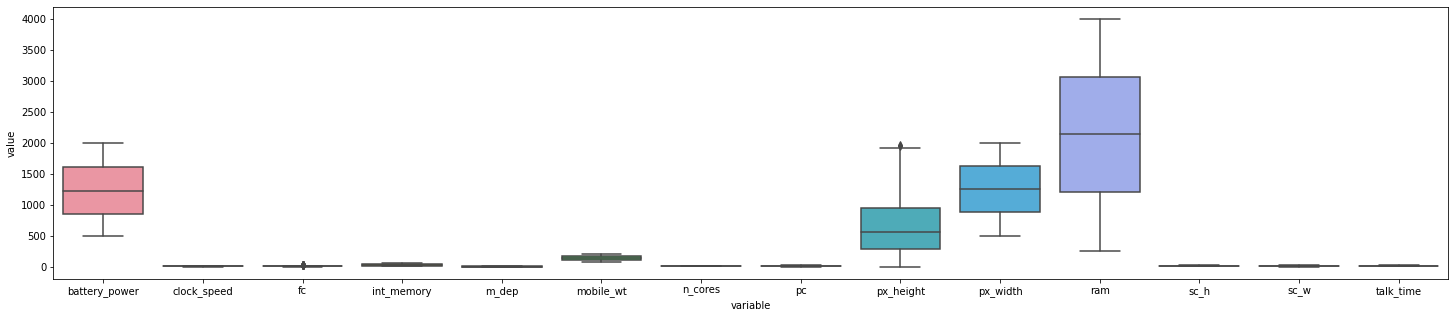

In [14]:
fig, ax = plt.subplots(figsize =(25,5))
sns.set(style="darkgrid")
sns.boxplot(x="variable", y="value", data=pd.melt(new_mp), orient ='v')

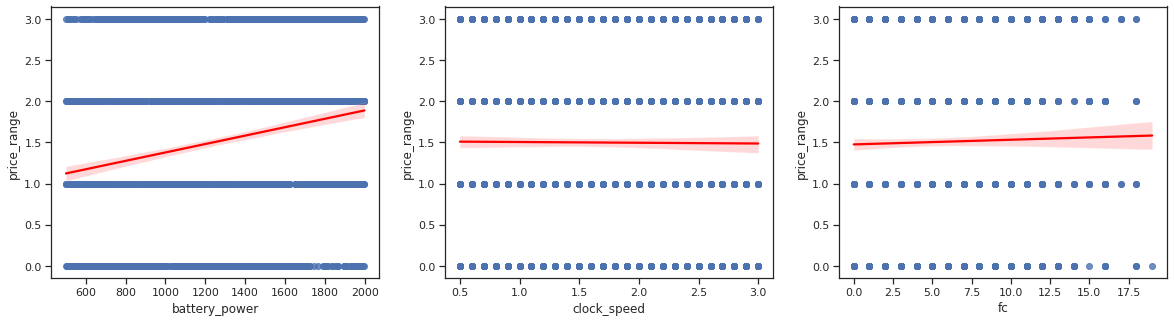

In [49]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)

sns.regplot(x="battery_power", y="price_range", data=mp, ax=ax1, line_kws = {'color' : 'red'})
sns.regplot(x="clock_speed", y="price_range", data=mp, ax=ax2, line_kws = {'color' : 'red'})
sns.regplot(x="fc", y="price_range", data=mp, ax=ax3, line_kws = {'color' : 'red'})

plt.show()

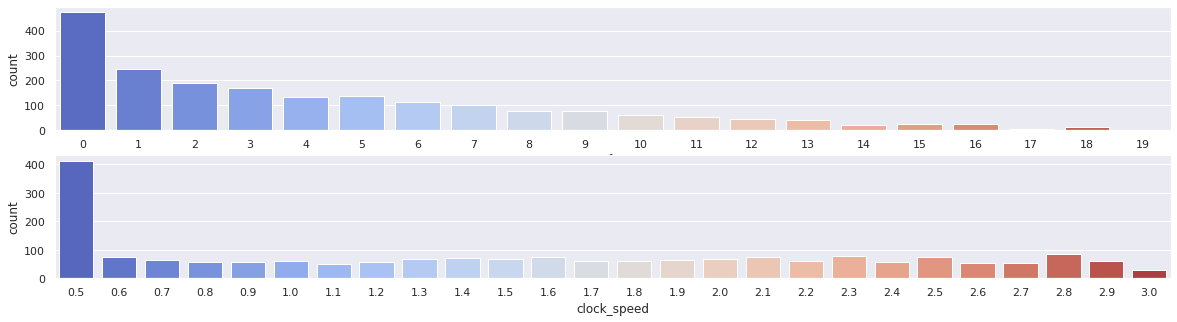

In [73]:
fig,(ax1, ax2) = plt.subplots(nrows=2)
fig.set_size_inches(20, 5)
sns.set_style('darkgrid')
	
sns.set_context("notebook")
sns.countplot(x ='fc', data = mp, ax=ax1, palette = 'coolwarm')
sns.countplot(x ='clock_speed', data = mp, ax=ax2, palette = 'coolwarm')
plt.show()

In [16]:
# The correlation between variables using the standard correlation coefficient (Pearson method).
mpc = mp.corr(method ='pearson')
mpc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,100.00%,1.13%,1.15%,-4.18%,3.33%,1.57%,-0.40%,3.41%,0.18%,-2.97%,...,1.49%,-0.84%,-0.07%,-3.00%,-2.14%,5.25%,1.15%,-1.05%,-0.83%,20.07%
blue,1.13%,100.00%,2.14%,3.52%,0.36%,1.34%,4.12%,0.40%,-0.86%,3.62%,...,-0.69%,-4.15%,2.64%,-0.30%,0.06%,1.39%,-3.02%,1.01%,-2.19%,2.06%
clock_speed,1.15%,2.14%,100.00%,-0.13%,-0.04%,-4.31%,0.65%,-1.44%,1.23%,-0.57%,...,-1.45%,-0.95%,0.34%,-2.91%,-0.74%,-1.14%,-4.64%,1.98%,-2.45%,-0.66%
dual_sim,-4.18%,3.52%,-0.13%,100.00%,-2.91%,0.32%,-1.57%,-2.21%,-0.90%,-2.47%,...,-2.09%,1.43%,4.11%,-1.19%,-1.67%,-3.94%,-1.40%,-1.71%,2.27%,1.74%
fc,3.33%,0.36%,-0.04%,-2.91%,100.00%,-1.66%,-2.91%,-0.18%,2.36%,-1.34%,...,-1.00%,-0.52%,1.51%,-1.10%,-1.24%,-0.68%,0.18%,-1.48%,2.01%,2.20%
four_g,1.57%,1.34%,-4.31%,0.32%,-1.66%,100.00%,0.87%,-0.18%,-1.65%,-2.97%,...,-1.92%,0.74%,0.73%,2.72%,3.70%,-4.66%,58.42%,1.68%,-1.76%,1.48%
int_memory,-0.40%,4.12%,0.65%,-1.57%,-2.91%,0.87%,100.00%,0.69%,-3.42%,-2.83%,...,1.04%,-0.83%,3.28%,3.78%,1.17%,-0.28%,-0.94%,-2.70%,0.70%,4.44%
m_dep,3.41%,0.40%,-1.44%,-2.21%,-0.18%,-0.18%,0.69%,100.00%,2.18%,-0.35%,...,2.53%,2.36%,-0.94%,-2.53%,-1.84%,1.70%,-1.21%,-0.26%,-2.84%,0.09%
mobile_wt,0.18%,-0.86%,1.23%,-0.90%,2.36%,-1.65%,-3.42%,2.18%,100.00%,-1.90%,...,0.09%,0.01%,-0.26%,-3.39%,-2.08%,0.62%,0.16%,-1.44%,-0.04%,-3.03%
n_cores,-2.97%,3.62%,-0.57%,-2.47%,-1.34%,-2.97%,-2.83%,-0.35%,-1.90%,100.00%,...,-0.69%,2.45%,0.49%,-0.03%,2.58%,1.31%,-1.47%,2.38%,-1.00%,0.44%


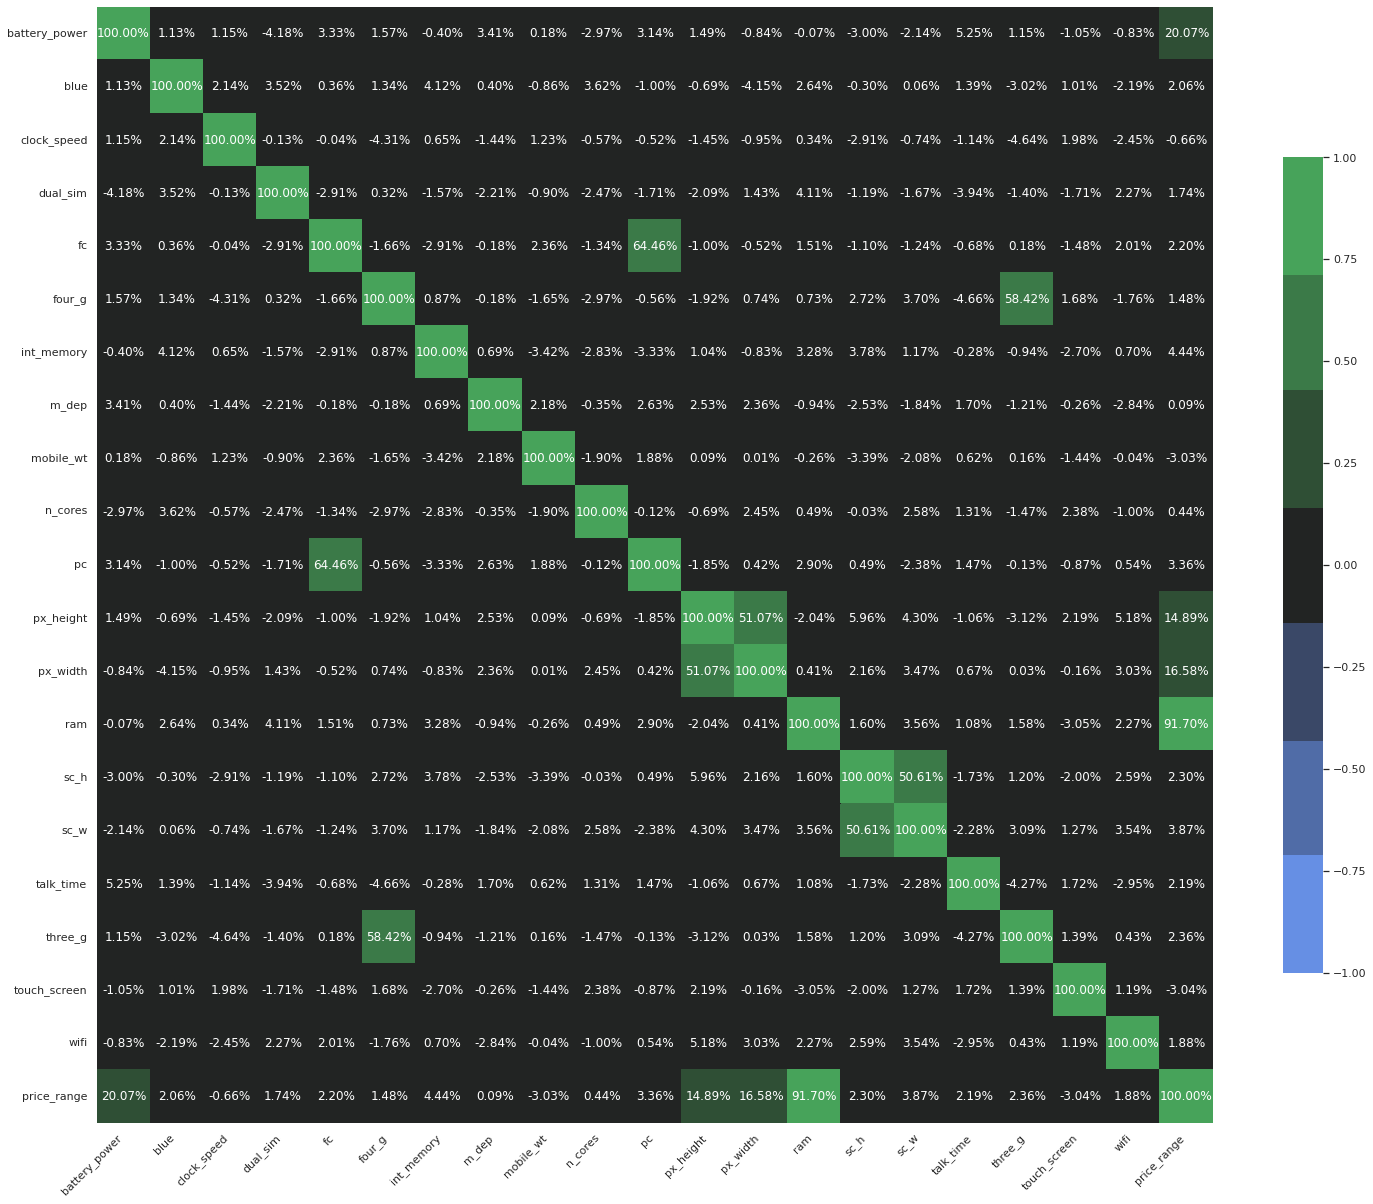

In [17]:
# The heatmap of correlation (Seaborn plot)
ax = plt.subplots(figsize=(25,25))
ax = sns.heatmap(mpc, vmin = -1, vmax=1, center=0, annot=True, fmt=".2%", cmap = sns.diverging_palette(255, 133, l=60, n=7, center="dark"), square = True, cbar_kws={"shrink": .6})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

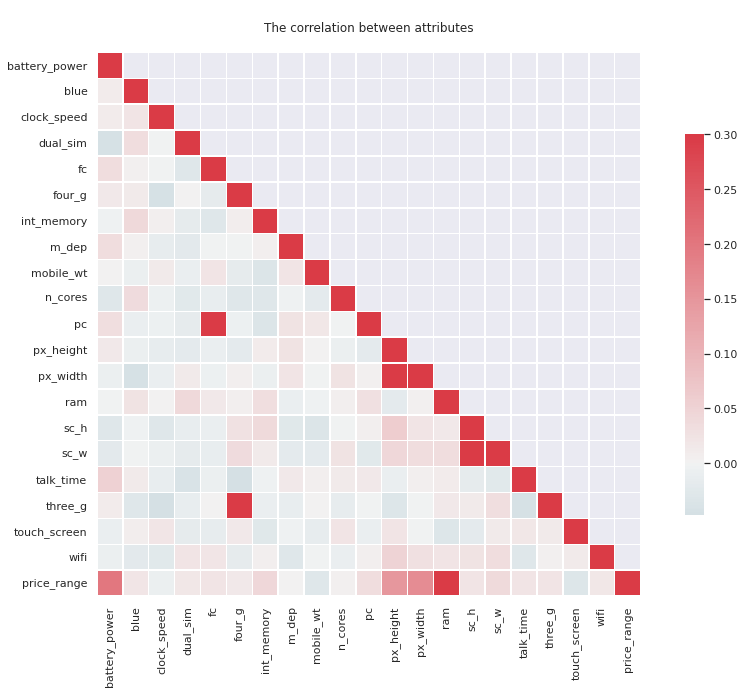

In [18]:
# The heatmap of correlation with a mask (Seaborn plot)
f, ax = plt.subplots(figsize=(16,10))
mask = np.array(mpc)
mask[np.tril_indices_from(mask)] = 0 # Creating the triangular matrix
sns.set(style="white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax.title.set_text('\n'+'The correlation between attributes' + '\n')

sns.heatmap(mpc, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .7})

Text(0.5, 1.0, '\nCorrelation between Attributes and Price Range\n')

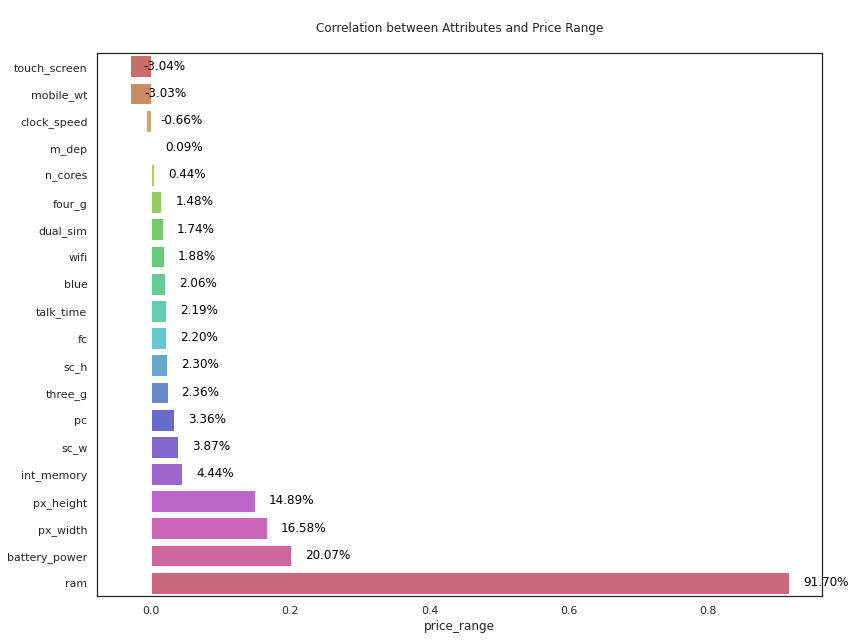

In [19]:
# The correlation between variables and the grouped price_range variable
f, ax = plt.subplots(figsize=(13,10))
sns.set_style('darkgrid')
corr = mpc.corr()
corr = mpc.price_range
cr = corr.sort_values(ascending = True)[:-1] # without price_range


sns.barplot(x=cr, y=cr.index, palette = "hls")

for i, v in enumerate(cr):
    ax.text(v + .02, i + .10, "{:.2%}".format(v), color = 'black')
plt.title("\n"+ "Correlation between Attributes and Price Range" +"\n")

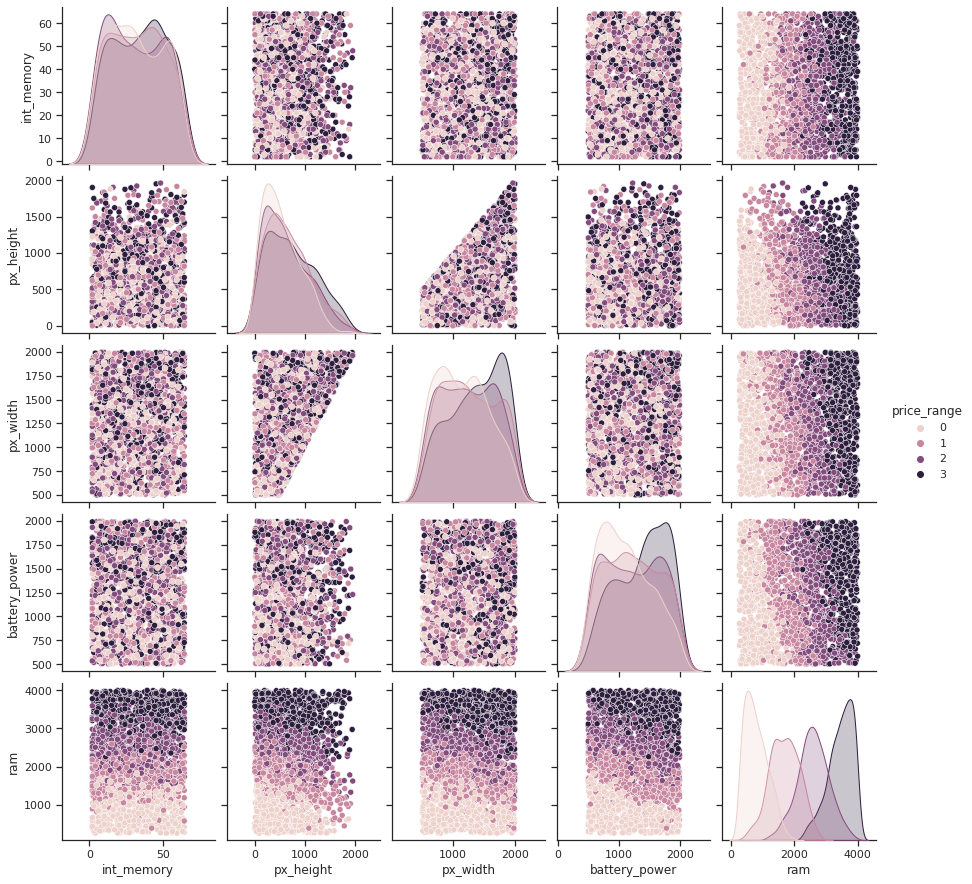

In [20]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(mp, vars = ["int_memory", "px_height", "px_width", "battery_power","ram"], hue="price_range", diag_kind="kde")